In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

### Data Cleaning

In [100]:
df = df.drop(['Name'],axis=1)

In [101]:
df.isnull().sum()


Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [102]:
df.shape

(15509, 9)

In [103]:
def fetech_count_and_percent_of_null(data):
    nv = df.isnull().sum()
    nv = nv[nv>0]
    res = pd.DataFrame({'feature':nv.index,'count_null':nv.values,'percent_null':(nv.values/data.shape[0])*100})
    res = res.sort_values('percent_null',ascending=False)
    return res

In [104]:
fetech_count_and_percent_of_null(df)

,feature,count_null,percent_null
1,Duration,8269,53.317429
3,Rating,7590,48.939326
4,Votes,7589,48.932878
8,Actor 3,3144,20.272100
7,Actor 2,2384,15.371720
2,Genre,1877,12.102650
6,Actor 1,1617,10.426204
0,Year,528,3.404475
5,Director,525,3.385131


In [105]:
df['Year'].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [106]:
def year_num(x):
    if pd.isna(x):
        return np.nan
    return int(str(x).strip('()'))


In [107]:
df['Year'] = df['Year'].apply(year_num)
df['Year'].sample(5)

10915    1993.0
12935    1956.0
3963     2016.0
9945     1988.0
3580     2021.0
Name: Year, dtype: float64

In [108]:
df['Year'] = pd.to_numeric(df['Year'])
df.dtypes

Year        float64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [109]:
df['Year'].mode()

0    2019.0
Name: Year, dtype: float64

In [110]:
df['Year'] = df['Year'].fillna(2019.0)

In [111]:
fetech_count_and_percent_of_null(df)

,feature,count_null,percent_null
0,Duration,8269,53.317429
2,Rating,7590,48.939326
3,Votes,7589,48.932878
7,Actor 3,3144,20.272100
6,Actor 2,2384,15.371720
1,Genre,1877,12.102650
5,Actor 1,1617,10.426204
4,Director,525,3.385131


In [112]:
df['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [113]:
def duration_time(x):
    if pd.isna(x):
        return np.nan
    return int(str(x).strip(' min'))

In [114]:
df['Duration'] = df['Duration'].apply(duration_time)
df['Duration'].sample(5)

9567       NaN
6876      93.0
5676     149.0
14495      NaN
7293       NaN
Name: Duration, dtype: float64

In [115]:
df['Duration'].mode()

0    120.0
Name: Duration, dtype: float64

In [116]:
df['Duration'] = df['Duration'].fillna(120.0)

In [117]:
fetech_count_and_percent_of_null(df)

,feature,count_null,percent_null
1,Rating,7590,48.939326
2,Votes,7589,48.932878
6,Actor 3,3144,20.272100
5,Actor 2,2384,15.371720
0,Genre,1877,12.102650
4,Actor 1,1617,10.426204
3,Director,525,3.385131


In [118]:
df['Rating'].unique()

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

In [119]:
df['Rating'].value_counts()

Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64

In [120]:
df['Rating'].mean()

5.841621416845562

In [121]:
df['Rating'].median()

6.0

In [122]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [123]:
fetech_count_and_percent_of_null(df)

,feature,count_null,percent_null
1,Votes,7589,48.932878
5,Actor 3,3144,20.272100
4,Actor 2,2384,15.371720
0,Genre,1877,12.102650
3,Actor 1,1617,10.426204
2,Director,525,3.385131


In [124]:
df['Votes'].value_counts()

Votes
8        227
7        224
9        221
6        213
10       175
        ... 
1,754      1
1,208      1
1,148      1
1,277      1
1,496      1
Name: count, Length: 2034, dtype: int64

In [125]:
df['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [126]:
df = df.drop('Votes',axis=1)

In [127]:
fetech_count_and_percent_of_null(df)

,feature,count_null,percent_null
4,Actor 3,3144,20.272100
3,Actor 2,2384,15.371720
0,Genre,1877,12.102650
2,Actor 1,1617,10.426204
1,Director,525,3.385131


In [128]:
df['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [129]:
df['Genre'] = df['Genre'].fillna('Drama')

In [130]:
df['Director'].unique()

array(['J.S. Randhawa', 'Gaurav Bakshi', 'Soumyajit Majumdar', ...,
       'Mozez Singh', 'Ved Prakash', 'Kiran Thej'], dtype=object)

In [131]:
df['Director'] = df['Director'].fillna('Others')

In [132]:
fetech_count_and_percent_of_null(df)

,feature,count_null,percent_null
2,Actor 3,3144,20.272100
1,Actor 2,2384,15.371720
0,Actor 1,1617,10.426204


In [134]:
df['Actor 3'].value_counts()

Actor 3
Pran             91
Shakti Kapoor    65
Anupam Kher      64
Jeevan           59
Prem Chopra      52
                 ..
Kayamali          1
Kirit Shah        1
Sanil Khosla      1
Anup Grover       1
Suparna Anand     1
Name: count, Length: 4820, dtype: int64

In [135]:
df['Actor 3'] = df['Actor 3'].fillna('Unkown')

In [136]:
df['Actor 2'].value_counts()

Actor 2
Rekha                 83
Hema Malini           72
Mithun Chakraborty    63
Dharmendra            61
Mala Sinha            48
                      ..
Paris Keswani          1
Shubhangi Latkar       1
Amit Ghosh             1
Ayushi Singh           1
Sarah Jane Dias        1
Name: count, Length: 4891, dtype: int64

In [137]:
df['Actor 2'] = df['Actor 2'].fillna('Rekha')

In [138]:
df['Actor 1'].value_counts()

Actor 1
Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: count, Length: 4718, dtype: int64

In [139]:
df['Actor 1'] = df['Actor 1'].fillna('Ashok Kumar')

In [140]:
fetech_count_and_percent_of_null(df)

,feature,count_null,percent_null


In [142]:
df.duplicated().sum()

409

In [143]:
df.drop_duplicates(inplace=True)

In [144]:
df.shape

(15100, 8)

In [145]:
df.dtypes

Year        float64
Duration    float64
Genre        object
Rating      float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [146]:
df.head()

,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,2019.0,120.0,Drama,6.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,2019.0,109.0,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021.0,90.0,"Drama, Musical",6.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019.0,110.0,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010.0,105.0,Drama,6.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### EDA

In [147]:
num_cols = df.dtypes[df.dtypes!="object"].index
cat_cols = df.dtypes[df.dtypes=="object"].index
print(num_cols)
print(cat_cols)

Index(['Year', 'Duration', 'Rating'], dtype='object')
Index(['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


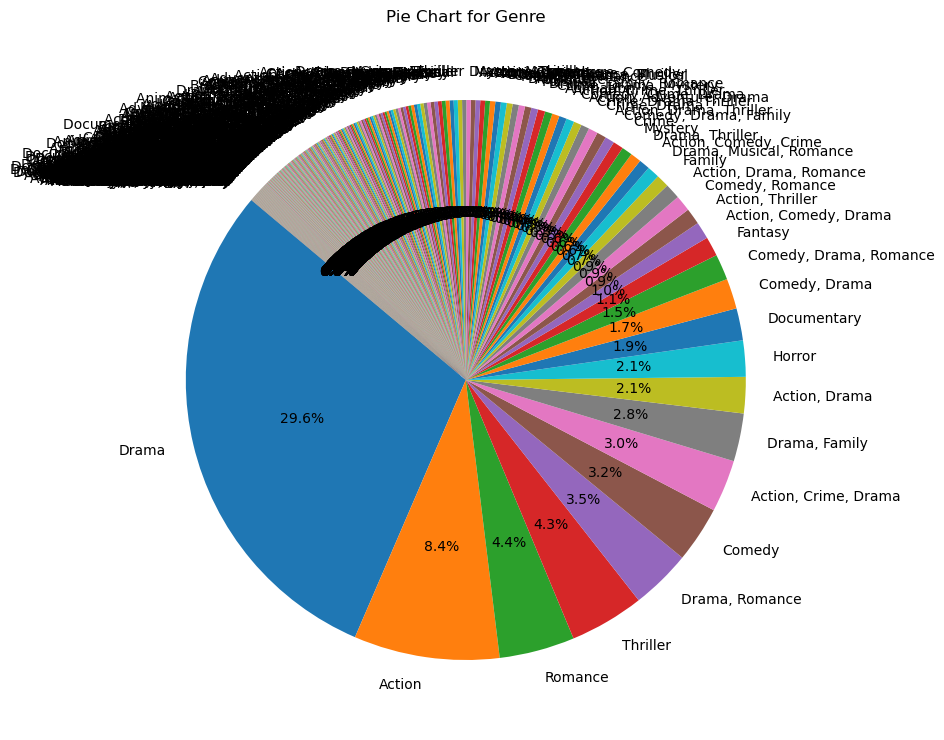

In [148]:
col = ['Genre']
plt.figure(figsize=(12,20))
for i in range(len(col)):
    plt.subplot(2, 1, 2)
    category_counts = df[col[i]].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart for {col[i]}')

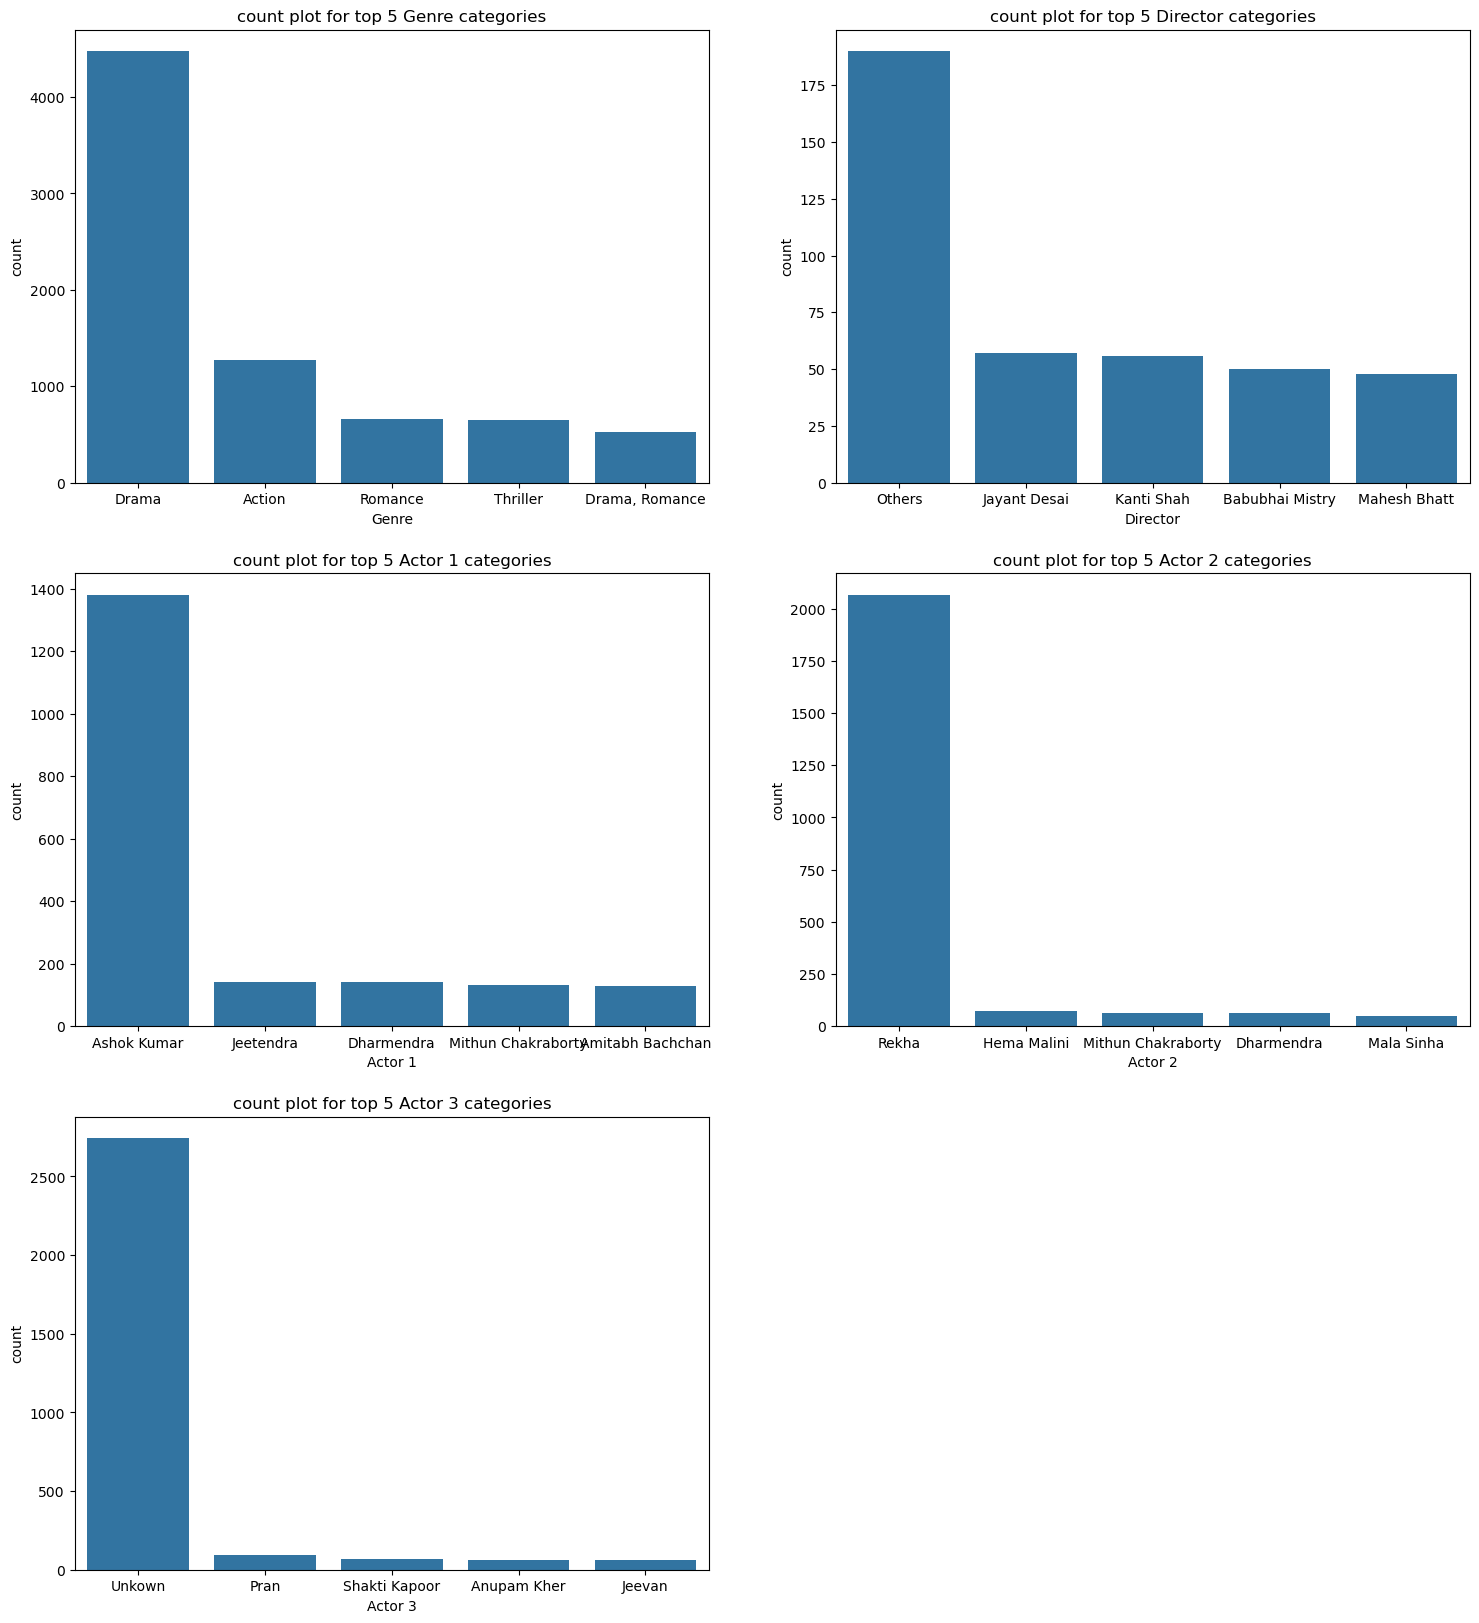

In [151]:
cols =['Genre','Director','Actor 1', 'Actor 2', 'Actor 3']
plt.figure(figsize=(18,20))
for i in range(len(cols)):
    top_cat = df[cols[i]].value_counts().nlargest(5)
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cols[i]],order=top_cat.index)
    plt.title(f'count plot for top 5 {cols[i]} categories')
plt.show()

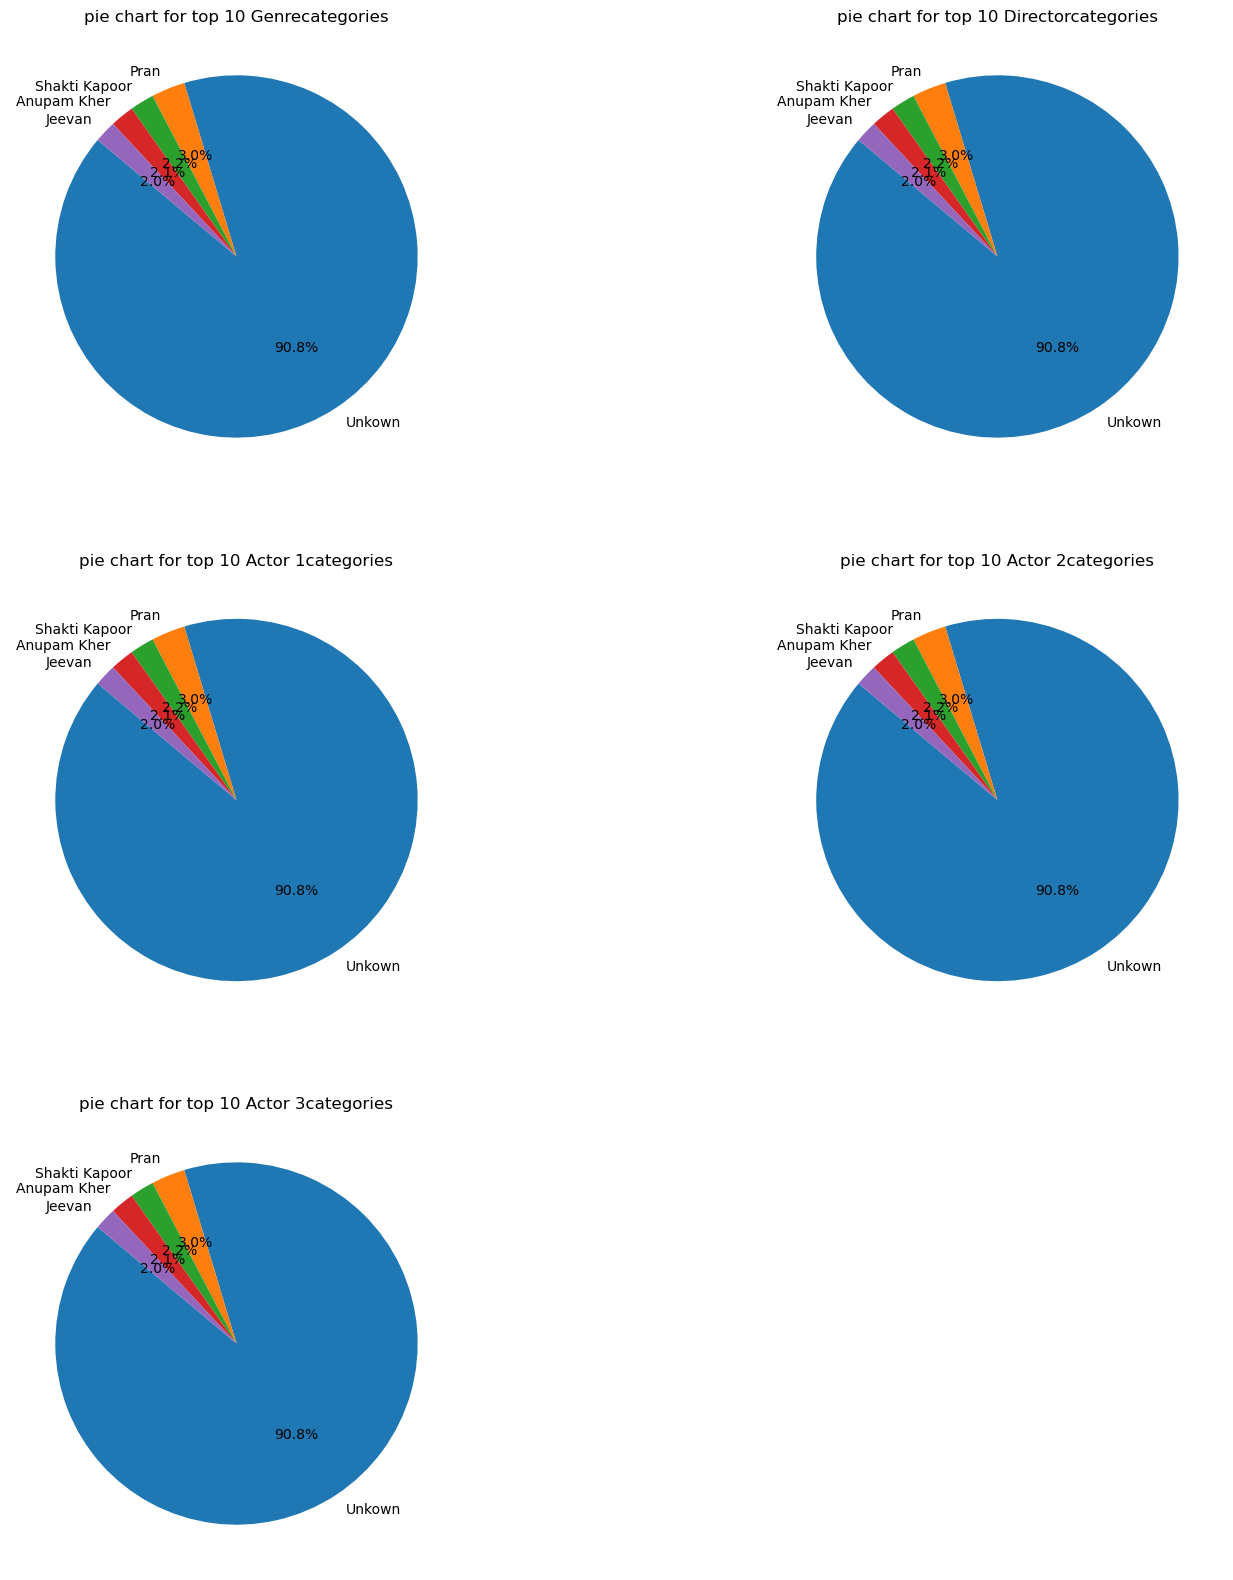

In [152]:
plt.figure(figsize=(18,20))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    plt.pie(top_cat,labels=top_cat.index,autopct='%1.1f%%',startangle=140)
    plt.title(f'pie chart for top 10 {cols[i]}categories')
plt.show()

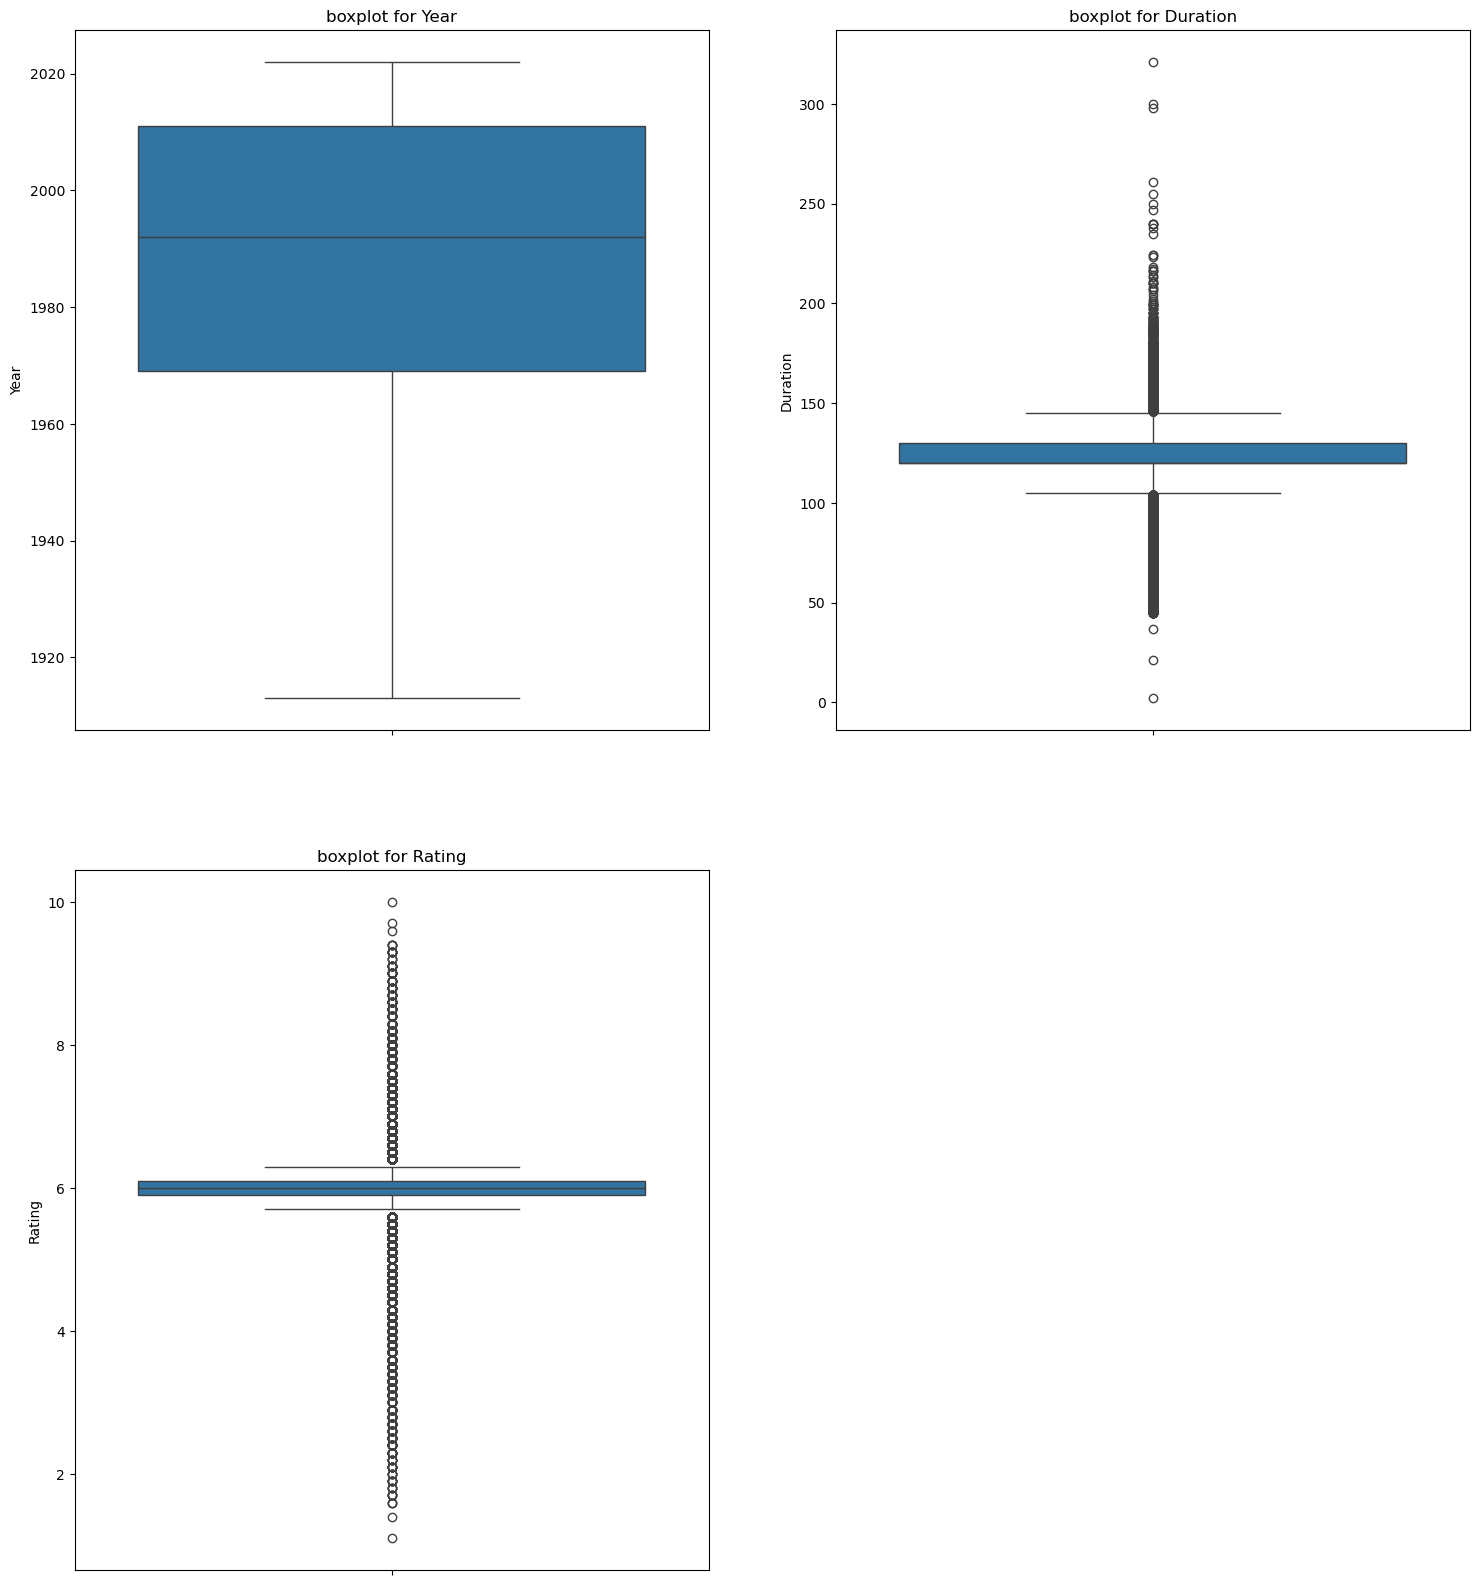

In [153]:
cols = ['Year', 'Duration', 'Rating']
plt.figure(figsize=(18,20))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[cols[i]])
    plt.title(f'boxplot for {cols[i]}')
plt.show()

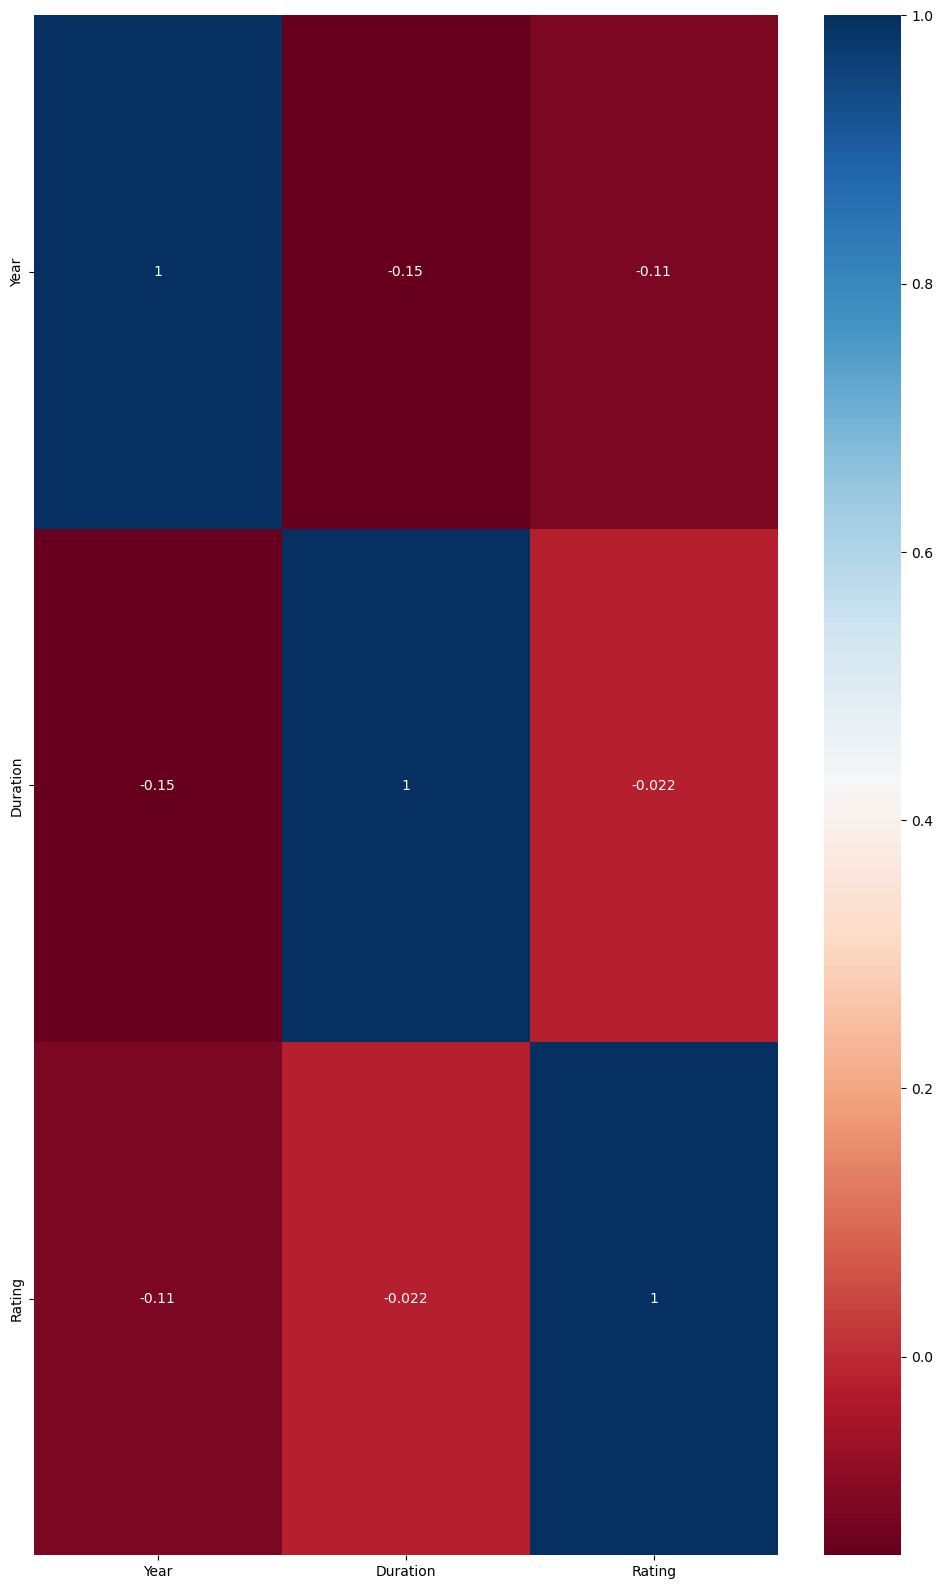

In [154]:
corr = df[num_cols].corr()
plt.figure(figsize=(12,20))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

###  Outliear treatment

In [155]:
a = df.describe(percentiles = [0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
Year,1913.0,1933.00,1935.0,1936.0,1992.0,2020.0,2021.0,2021.0,2022.0
Duration,2.0,59.99,72.0,81.0,120.0,168.0,172.0,180.0,321.0
Rating,1.1,2.80,3.2,3.4,6.0,7.8,8.0,8.3,10.0


In [156]:
cols_left_skewed = ['Duration','Rating']
def lower_outlier_treatment(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

In [157]:
df[cols_left_skewed] = df[cols_left_skewed].apply(lower_outlier_treatment)

In [158]:
cols_right_skewed = ['Duration','Rating']
def upper_outlier_treatment(x):
    x = x.clip(upper= x.quantile(0.99))
    return x

In [159]:
df[cols_right_skewed] = df[cols_right_skewed].apply(upper_outlier_treatment)

In [160]:
a = df.describe(percentiles = [0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
Year,1913.00,1933.0000,1935.0,1936.0,1992.0,2020.0,2021.0,2021.0,2022.0
Duration,59.99,59.9999,72.0,81.0,120.0,168.0,172.0,180.0,180.0
Rating,2.80,2.8000,3.2,3.4,6.0,7.8,8.0,8.3,8.3


### Encoding

In [161]:
for i in cat_cols:
    print(f'{i}',df[i].nunique())

Genre 485
Director 5939
Actor 1 4718
Actor 2 4891
Actor 3 4821


In [162]:
from sklearn.preprocessing import LabelEncoder

In [163]:
label_encoders = {}
for column in cat_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [164]:
df.dtypes

Year        float64
Duration    float64
Genre         int32
Rating      float64
Director      int32
Actor 1       int32
Actor 2       int32
Actor 3       int32
dtype: object

In [165]:
df.sample(5)

,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
4029,1975.0,135.0,225,6.1,3155,3075,3204,3808
1634,1998.0,119.0,0,2.8,1625,1579,4001,2737
13298,2012.0,97.0,409,5.3,801,1418,1336,4805
4150,2011.0,120.0,0,5.8,3775,2621,4020,942
14799,1938.0,120.0,299,6.0,1206,2998,3402,4481


### Select x and y

In [166]:
x = df.drop('Rating',axis=1)
y = df['Rating']
print(x.shape)
print(y.shape)

(15100, 7)
(15100,)


In [167]:
x.dtypes

Year        float64
Duration    float64
Genre         int32
Director      int32
Actor 1       int32
Actor 2       int32
Actor 3       int32
dtype: object

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [170]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10570, 7)
(4530, 7)
(10570,)
(4530,)


### Linear regression

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error


In [172]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)
ypred_lr1 = lr1.predict(x_test)

In [173]:
def eval_model(model,x_train,y_train,x_test,y_test,modelname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse},index=[modelname])
    return res

In [174]:
lr1_df = eval_model(lr1,x_train,y_train,x_test,y_test,'Lin_reg1')
lr1_df

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_reg1,0.02606,0.02728,0.630862,0.92512,0.961832


### Ridge, Lasso

In [175]:
from sklearn.linear_model import Ridge, Lasso

In [176]:
rid1 = Ridge(alpha=2.5)
rid1.fit(x_train,y_train)
ypred_red1 = rid1.predict(x_test)

In [178]:
rid1_df = eval_model(rid1,x_train,y_train,x_test,y_test,'Ridge')
rid1_df

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Ridge,0.02606,0.02728,0.630862,0.92512,0.961832


In [179]:
las1 = Lasso(alpha=1.9)
las1_res = eval_model_advanced(las1,x_train,y_train,x_test,y_test,'Lasso')
las1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lasso,0.019332,0.020967,0.616733,0.931124,0.964948


### DT

In [203]:
from sklearn.tree import DecisionTreeRegressor

In [207]:
dt1 = DecisionTreeRegressor(max_depth=60,min_samples_leaf=1, min_samples_split=5)
dt1.fit(x_train,y_train)
ypred_dt1 =dt1.predict(x_test)

In [208]:
dt1_df = eval_model(dt1,x_train,y_train,x_test,y_test,'Dtree1')
dt1_df

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Dtree1,0.903448,-0.602238,0.800429,1.523833,1.234436


In [210]:
from sklearn.model_selection import GridSearchCV

In [218]:
dtree = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=dtree,
        param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

print(f"Best Parameters: {best_params}")
print(f"Test R2: {test_r2}")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test R2: 0.11518811829304942
Test MSE: 0.8415136610631812
Test RMSE: 0.9173405371306673


In [219]:
dt2 = DecisionTreeRegressor(max_depth=5,min_samples_leaf=4, min_samples_split=2)
dt2.fit(x_train,y_train)
ypred_dt2 =dt2.predict(x_test)

In [220]:
dt2_df = eval_model(dt2,x_train,y_train,x_test,y_test,'Dtree2')
dt2_df

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Dtree2,0.156527,0.115188,0.602199,0.841514,0.917341


### Random Forest 

In [221]:
from sklearn.ensemble import RandomForestRegressor

In [222]:
rf1 = RandomForestRegressor(n_estimators=120,min_samples_split=12,max_depth=18)
rf1.fit(x_train,y_train)
ypred_rf1  = rf1.predict(x_test)

In [223]:
rf1_df = eval_model(rf1,x_train,y_train,x_test,y_test,'RForest1')
rf1_df

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
RForest1,0.651498,0.137072,0.595081,0.820701,0.905925


In [224]:
rf = RandomForestRegressor()
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf,
        param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

print(f"Best Parameters: {best_params}")
print(f"Test R2: {test_r2}")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
Test R2: 0.15512381027210653
Test MSE: 0.8035322199691087
Test RMSE: 0.8963995872205145


In [234]:
rf2 = RandomForestRegressor(n_estimators=100,min_samples_split=5)
rf2.fit(x_train,y_train)
ypred_rf2  = rf2.predict(x_test)

In [235]:
rf2_df = eval_model(rf2,x_train,y_train,x_test,y_test,'RForest2')
rf2_df

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
RForest2,0.82258,0.122434,0.603639,0.834622,0.913577


In [231]:
from sklearn.model_selection import RandomizedSearchCV

In [232]:
hparams_rf = {'n_estimators':[10,15,35,60,70,80,90,100,120,150],
              'max_depth':[6,7,8,9,10,12,15,16,17,18,19,20],
              'min_samples_split':[4,5,8,10,12,15,20,22,24,26]}

print(10*12*10)
rf_base1 = RandomForestRegressor()
rs1 = RandomizedSearchCV(rf_base1,param_distributions=hparams_rf,cv=5,
                        scoring='neg_mean_squared_error')
rs1.fit(x_train,y_train)

1200


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, 12, 15,
                                                      16, 17, 18, 19, 20],
                                        'min_samples_split': [4, 5, 8, 10, 12,
                                                              15, 20, 22, 24,
                                                              26],
                                        'n_estimators': [10, 15, 35, 60, 70, 80,
                                                         90, 100, 120, 150]},
                   scoring='neg_mean_squared_error')

In [233]:
print(rs1.best_score_)
print(rs1.best_params_)

-0.8125285324471143
{'n_estimators': 100, 'min_samples_split': 22, 'max_depth': 10}


In [244]:
rf3 = RandomForestRegressor(n_estimators=100,min_samples_split=5)
rf3.fit(x_train,y_train)
ypred_rf3  = rf3.predict(x_test)

In [245]:
rf3_df = eval_model(rf3,x_train,y_train,x_test,y_test,'RForest3')
rf3_df

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
RForest3,0.822771,0.12745,0.60306,0.829852,0.910962


### Prediction for test data

In [247]:
ypred_rf= rf3.predict(x_test)
res = pd.DataFrame({'Rating':y_test,
                   'Prediction':ypred_rf})
res.sample(10)

,Rating,Prediction
4705,8.3,6.665906
398,6.6,6.144426
6357,6.0,5.770988
6813,5.6,5.825368
59,6.0,6.264410
7256,4.7,6.102707
5249,4.4,4.908450
184,2.8,5.578775
291,6.0,5.555387
9855,6.0,5.781118
